In [1]:
import csv

In [2]:
import pandas as pd

In [16]:
!ls ..

cls_magret		     __pycache__
create_pretraining_data.py   README.md
extract_features.py	     requirements-3_5.txt
funcname_magret		     requirements-3_7.txt
__init__.py		     run_create_data.sh
modeling.py		     run_mlm.sh
modeling.pyc		     run_prepare_data.sh
modeling_test.py	     run_prepare_single_data.sh
notebook		     run_pretraining.py
optimization.py		     split_magret
optimization.pyc	     tokenization.py
optimization_test.py	     tokenization.pyc
prepare_pretraining_data.py  tokenization_test.py
py35			     utils
py37


In [17]:
results_df = pd.read_csv('../funcname_magret/pretraining_output/eval_results_masked_lm.txt')
results_df.head(10)

,masked_lm_predictions,label_ids,masked_lm_positions,0,1,2,3,4,5,6,...,54,55,56,57,58,59,60,61,62,63
0,25,25,11,2,6,44,25,140,43,237,...,0,0,0,0,0,0,0,0,0,0
1,53,38,5,2,237,25,776,38,4,30,...,0,0,0,0,0,0,0,0,0,0
2,1142,1142,9,2,53,1142,417,230,110,25,...,0,0,0,0,0,0,0,0,0,0
3,111,111,1,2,4,127,44,53,25,25,...,0,0,0,0,0,0,0,0,0,0
4,319,319,7,2,603,30,25,257,319,319,...,0,0,0,0,0,0,0,0,0,0
5,257,257,14,2,6,44,1142,856,857,25,...,0,0,0,0,0,0,0,0,0,0
6,469,469,44,2,6,44,38,30,25,257,...,0,0,0,0,0,0,0,0,0,0
7,25,25,6,2,57,58,59,107,237,4,...,0,0,0,0,0,0,0,0,0,0
8,319,319,14,2,38,38,38,38,426,242,...,0,0,0,0,0,0,0,0,0,0
9,242,242,8,2,38,38,1142,366,25,81,...,0,0,0,0,0,0,0,0,0,0


In [18]:
vocab_df = pd.read_csv('../funcname_magret/vocab-code.txt', header=None)
vocab_df.head(10)

,0
0,[PAD]
1,[UNK]
2,[CLS]
3,[SEP]
4,[MASK]
5,[cls]
6,if
7,unaryop
8,not
9,call


In [19]:
vocab_df2 = pd.read_csv('../../bert-cmp/bert/vocab-code.txt', header=None)
vocab_df2.head(10)

,0
0,[PAD]
1,[UNK]
2,[CLS]
3,[SEP]
4,[MASK]
5,if
6,unaryop
7,not
8,call
9,name


In [20]:
set(vocab_df[0]) - set(vocab_df2[0])

{'[cls]',
 'accuracy',
 'batches',
 'categorical',
 'cw',
 'existing',
 'lengths',
 'modes',
 'ref',
 'score',
 'suffix'}

In [21]:
len(vocab_df)

1156

In [22]:
accuracy = 0

In [23]:
per_token_acc = {}; per_token_count = {}

In [24]:
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if per_token_acc.get(label, None) == None:
        per_token_acc[label] = 0
        per_token_count[label] = 0
    per_token_acc[label] += int(prediction == label)
    per_token_count[label] += 1
    accuracy += int(prediction == label)
    #print("Predicted --", prediction)
    #print("Label     --", label)
    #print()

In [25]:
total_per_token_accuracy = {}
per_token_freq = {}
for k,v in per_token_acc.items():
    if per_token_count[k] > 0:
        total_per_token_accuracy[k] = v / per_token_count[k]
        per_token_freq[k] = per_token_count[k] / len(results_df)

In [26]:
import matplotlib.pyplot as plt

In [27]:
from collections import Counter
import numpy as np

In [28]:
c = Counter(total_per_token_accuracy)
c.most_common(100)

[('normalization', 1.0),
 ('expand', 1.0),
 ('floatx', 1.0),
 ('expected', 1.0),
 ('lte', 1.0),
 ('truncated', 1.0),
 ('pad', 1.0),
 ('join', 1.0),
 ('backwards', 1.0),
 ('iterations', 1.0),
 ('initial', 1.0),
 ('totals', 1.0),
 ('sqrt', 1.0),
 ('randint', 1.0),
 ('conv2d', 1.0),
 ('usub', 1.0),
 ('equal', 1.0),
 ('run', 1.0),
 ('inferreddimension', 1.0),
 ('deconv', 1.0),
 ('decay', 0.9722222222222222),
 ('boolop', 0.9701492537313433),
 ('subscript', 0.9675052410901468),
 ('comprehension', 0.9635036496350365),
 ('names', 0.9615384615384616),
 ('items', 0.961038961038961),
 ('index', 0.9608076009501187),
 ('functiondef', 0.9513888888888888),
 ('init', 0.95),
 ('cast', 0.9361702127659575),
 ('square', 0.9333333333333333),
 ('add', 0.9321100917431193),
 ('unaryop', 0.9205607476635514),
 ('binop', 0.9179487179487179),
 ('not', 0.9081632653061225),
 ('strides', 0.9038461538461539),
 ('arguments', 0.9019607843137255),
 ('compare', 0.8963531669865643),
 ('set', 0.8888888888888888),
 ('attrs'

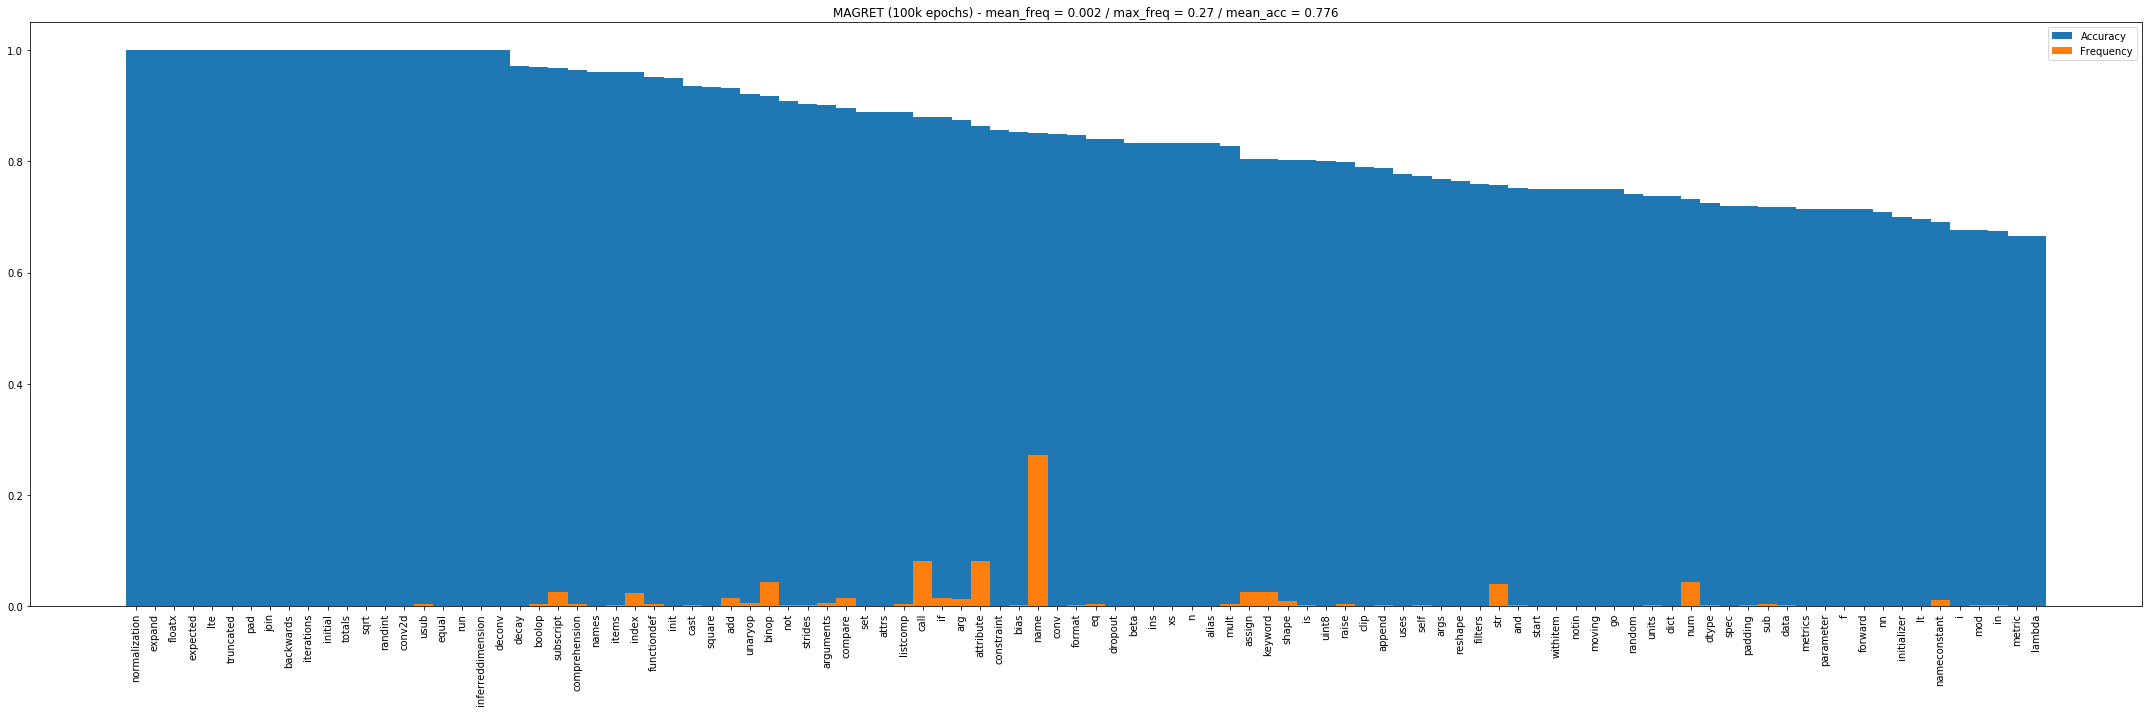

In [37]:
plt.figure(figsize=(30,10))
labels, values = zip(*c.most_common(100))

indexes = np.arange(len(labels))
width = 1

freqs = [per_token_freq[l] for l in labels]

mean_freq = np.mean(list(per_token_freq.values()))
mean_acc = (accuracy / len(results_df))

plt.bar(indexes, values, width, label='Accuracy')
plt.bar(indexes, freqs, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('MAGRET (100k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
plt.savefig('MAGRET-100k_epochs_top100.png')
plt.show()

In [30]:
pred = list(results_df.loc[10][3:])
pred

[2,
 398,
 53,
 1142,
 95,
 25,
 53,
 1142,
 298,
 25,
 38,
 25,
 961,
 4,
 655,
 7,
 98,
 319,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [31]:
pred_str = [vocab_df.loc[i][0] for i in pred]

In [32]:
pred_str

['[CLS]',
 'return',
 'call',
 'attribute',
 'mean',
 'name',
 'call',
 'attribute',
 'square',
 'name',
 'binop',
 'name',
 'sub',
 '[MASK]',
 'keyword',
 'unaryop',
 'usub',
 'num',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [33]:
d = Counter(per_token_freq)
d.most_common(100)

[('name', 0.27117486338797814),
 ('call', 0.0812568306010929),
 ('attribute', 0.0805464480874317),
 ('num', 0.043469945355191254),
 ('binop', 0.04262295081967213),
 ('str', 0.040437158469945354),
 ('subscript', 0.026065573770491804),
 ('keyword', 0.025136612021857924),
 ('assign', 0.024918032786885248),
 ('index', 0.023005464480874316),
 ('if', 0.015218579234972678),
 ('add', 0.014890710382513661),
 ('compare', 0.01423497267759563),
 ('tuple', 0.013961748633879782),
 ('arg', 0.013333333333333334),
 ('nameconstant', 0.010710382513661203),
 ('return', 0.00912568306010929),
 ('shape', 0.008469945355191256),
 ('expr', 0.006010928961748634),
 ('unaryop', 0.005846994535519126),
 ('arguments', 0.005573770491803279),
 ('slice', 0.005409836065573771),
 ('x', 0.005273224043715847),
 ('raise', 0.004754098360655738),
 ('list', 0.004726775956284153),
 ('mult', 0.004289617486338798),
 ('functiondef', 0.003934426229508197),
 ('comprehension', 0.0037431693989071037),
 ('sub', 0.0036885245901639345),
 

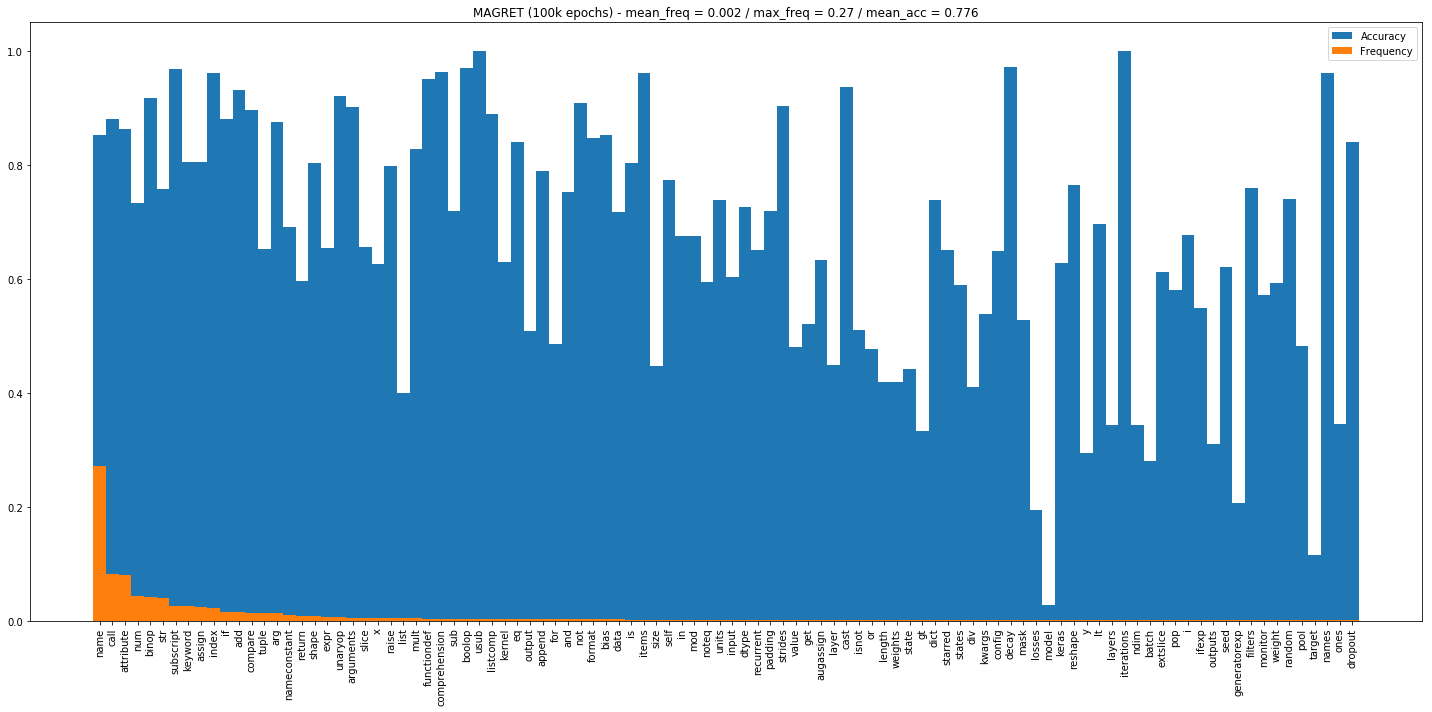

In [36]:
plt.figure(figsize=(20,10))
labels, values = zip(*d.most_common(100))

indexes = np.arange(len(labels))
width = 1

accuracies = [c[tok] for tok in labels]

plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('MAGRET (100k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
plt.savefig('MAGRET-freq-100k_epochs_top100.png')
plt.show()